# Track reconstruction validation

## In this notebook we are going to take the ROOT file produced by the validatetracksjob.fcl and make some plots!

Lets start by importing the relevant libraries

In [1]:
import pandas as pd
import uproot
import awkward
import matplotlib.pyplot as plt

Now, open the file we wish to collect the data from.

In [2]:
file = uproot.open('validationOutput.root')

directory = file['ana']
tree = directory['tree']
print('Tree name:', tree.name)
print('Tree title:', tree.title)
print('Number of entries:', tree.numentries)

Tree name: b'tree'
Tree title: b'Analysis Output Tree'
Number of entries: 84


Another way to access the tree would be tree = file['ana']['tree'].

Once the tree has been identified, we can access its keys, or variables. However, the size of those variables aren't all the same.

In [3]:
tree.keys()
tree.arrays()

{b'eventID': array([1.40e-45, 2.80e-45, 4.20e-45, 5.61e-45, 7.01e-45, 8.41e-45,
        9.81e-45, 1.12e-44, 1.26e-44, 1.40e-44, 1.54e-44, 1.68e-44,
        1.82e-44, 1.96e-44, 2.10e-44, 2.38e-44, 2.52e-44, 2.66e-44,
        3.08e-44, 3.22e-44, 3.36e-44, 3.64e-44, 3.78e-44, 4.20e-44,
        4.34e-44, 4.48e-44, 4.62e-44, 4.76e-44, 4.90e-44, 5.04e-44,
        5.47e-44, 5.61e-44, 5.75e-44, 5.89e-44, 6.03e-44, 6.17e-44,
        6.31e-44, 6.45e-44, 6.73e-44, 6.87e-44, 7.01e-44, 7.15e-44,
        7.29e-44, 7.43e-44, 7.57e-44, 7.71e-44, 7.85e-44, 7.99e-44,
        8.13e-44, 8.27e-44, 8.41e-44, 8.69e-44, 8.83e-44, 9.11e-44,
        9.25e-44, 9.53e-44, 9.67e-44, 9.81e-44, 9.95e-44, 1.02e-43,
        1.04e-43, 1.06e-43, 1.08e-43, 1.09e-43, 1.11e-43, 1.14e-43,
        1.15e-43, 1.16e-43, 1.19e-43, 1.21e-43, 1.22e-43, 1.23e-43,
        1.25e-43, 1.26e-43, 1.28e-43, 1.29e-43, 1.30e-43, 1.32e-43,
        1.33e-43, 1.35e-43, 1.36e-43, 1.37e-43, 1.39e-43, 1.40e-43],
       dtype=float32),
 b'nPFPartic

This array is a dictionary with annoying 'b' (byte) at the front. We can remove this by defining the branches as follow

In [4]:
branches = tree.arrays(namedecode='utf-8')
branches.keys()

dict_keys(['eventID', 'nPFParticles', 'nPrimaries', 'nDaughters', 'particleID', 'particlePDG', 'Lengths', 'ValidPoints', 'CosTheta', 'Phi', 'StartX', 'StartY', 'StartZ', 'EndX', 'EndY', 'EndZ'])

In [5]:
print('eventID branch type:', type(branches['eventID']))
print('StartY branch type:', type(branches['StartY']))
branches['StartY']

eventID branch type: <class 'numpy.ndarray'>
StartY branch type: <class 'awkward.array.jagged.JaggedArray'>


<JaggedArray [[80.0566 81.86786] [144.03868] [-199.6801] ... [-121.9194] [-188.01895 -187.96637] [-36.51402]] at 0x000113a18690>

The eventID branch is a simple numpy array. However, StartY is of another special kind: a jagged array. This is because the number of entries is different for different events.
We can look at them anyway! Note that there are square brackets [] surrounding the list of entries for each event. This is basically an array of arrays, or a 2D array. So we can look at the values for the collection of PFParticles of a particular event.

In [6]:
for i in range(10):
    print(branches['StartY'][i])

[80.0566  81.86786]
[144.03868]
[-199.6801]
[84.88349  84.823135]
[144.36487 162.59413 144.30197 145.04634]
[200.03487]
[-47.162586]
[-122.69484  -124.106544]
[123.516205 120.42123  120.727196 122.99127  106.68404 ]
[-141.14005]


The branches object that is not convenient for getting information from all branches at once for one particular event. We can get this functionality with a Table. Table is a class in the awkward package that uproot uses to handle jagged arrays. We can create a Table from our branches object:

In [7]:
table = awkward.Table(branches)
print(table[5]['StartX'])

[79.36575]


Now a given event we can see all the PFParticles' information at once for, say, the first event:

In [8]:
for column_name in table[0]:
    print(column_name, '=', table[0][column_name])

eventID = 1e-45
nPFParticles = 7e-45
nPrimaries = 1e-45
nDaughters = [0 0 0 0 4]
particleID = [0 1 2 3 4]
particlePDG = [11 13 13 11 12]
Lengths = [46.78872  25.828798]
ValidPoints = [176. 156.]
CosTheta = [0.75512373 0.8953485 ]
Phi = [-0.11911233  2.7008083 ]
StartX = [-180.33942 -181.30333]
StartY = [80.0566  81.86786]
StartZ = [475.30435 476.8262 ]
EndX = [-143.49002 -191.37592]
EndY = [65.63044  86.610855]
EndZ = [499.6893  500.13013]


## Let's actually plot something

### Numpy arrays
You will notice that plotting standard arrays is quite straight forward:

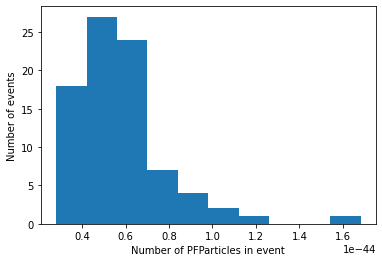

In [9]:
plt.hist(branches['nPFParticles'])
plt.xlabel('Number of PFParticles in event')
plt.ylabel('Number of events')
plt.show()

So straight forward that we didn't really have to go through all the hasle above as we could have simply declared a data frame:

<AxesSubplot:ylabel='Frequency'>

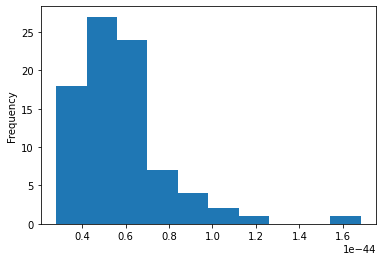

In [24]:
df_reco = file['ana']['tree'].pandas.df('*', flatten=False)
#print(df_reco)
df_reco['nPFParticles'].plot.hist()

However, neither the branch or the data frame offer a solution for plotting all the PFParticle information. For instance, you'd get an error if you tried doing df_reco['Lenghts'].plot.hist()

### Jagged arrays

As matplot expects 1D arrays, we'd need to flatten the jagged 2D array into a 1D array. Simply add .flatten() to the branch array:

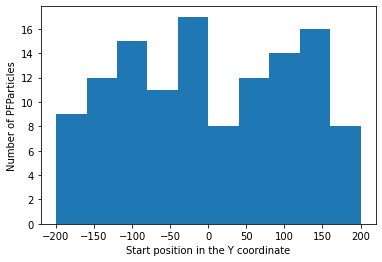

In [11]:
plt.hist(branches['StartY'].flatten())
plt.xlabel('Start position in the Y coordinate')
plt.ylabel('Number of PFParticles')
plt.show()

## Counting entries

All of the following will coincide

In [13]:
print(len(tree))
print(len(table))
print(len(branches['nPFParticles']))
print(len(branches['StartY']))

84
84
84
84


This is not the total number of PFParticles. If we want the PFParticles:

In [16]:
len(branches['StartY'].flatten()) # or any other branch

122

## Selection

In [19]:
branches['nPFParticles'] >= 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [33]:
reco_pfparticles = branches['nPFParticles'] > 1
reco_pfparticles.sum() # summing the events passing the selection

0

We can now use this selection and apply it to our data. For example, I want all the StartY position of all the PFParticles. Therefore, an event should have at least 1 PFParticle. But, for some reason the tree that I made is not counting the PFParticles. As we should expect from above:

In [36]:
branches['StartY'][reco_pfparticles]
len(branches['StartY'][reco_pfparticles])

0